# Проведение A/B-теста и анализ результатов для крупного интернет-магазина

Вместе с отделом маркетинга я подготовила список гипотез для увеличения выручки. 

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать его результаты.


Данные для первой части

/datasets/hypothesis.csv.

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    Данные для второй части
Файл /datasets/orders.csv. 

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_colwidth', 0)
pd.options.display.float_format = '{:,.2f}'.format

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#Приведу названия столбцов к нижниму регистру
hypothesis.columns = hypothesis.columns.str.lower()

#### ICE

In [5]:
#ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») 
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Приоритетными являются 8,0,7,6 и 2.

#### RICE

In [6]:
hypothesis['RICE'] = (hypothesis['impact']*hypothesis['reach']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Согласно фреймворку RICE приоритетными гипотезами являются: 7,2,0,6 и 8. Гипотеза 7 на первом месте так как параметр Reach(охват пользователей) равен 10, в то время как у других гипотез он меньше. Очень важно количество пользователей, которых затронет гипотеза.


### Анализ A/B-теста

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
#Столбец date перевожу в формат datetime
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
#Переименую столбы для удобства
orders.columns = orders.columns.str.lower()

In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
#Столбец date перевожу в формат datetime
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d %H:%M:%S')

In [14]:
visitors.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

Названия столбцов изменила на строчные буквы в датафрейме orders, дубликатов нет, пропущенных значений исходя из info тоже. Вроде бы меня устраивает :)

#### График кумулятивной выручки по группам

In [16]:
#Датафрейм уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [17]:
# Получу строки из orders, дата которых <= дате элемента из datesGroups, а группа теста равна группе из datesGroups
# Агрегирую значения, найду число уникальных ID заказов и пользователей
# Подсчитаю сумму средних чеков

ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
)

# Получу строки из visitors, агрегирую значения
# Посчитаю количество пользователей

visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

#Объединю кумулятивные данные в одной таблице и присвою названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cummulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


In [18]:
cummulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
orders      62 non-null int64
buyers      62 non-null int64
revenue     62 non-null int64
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


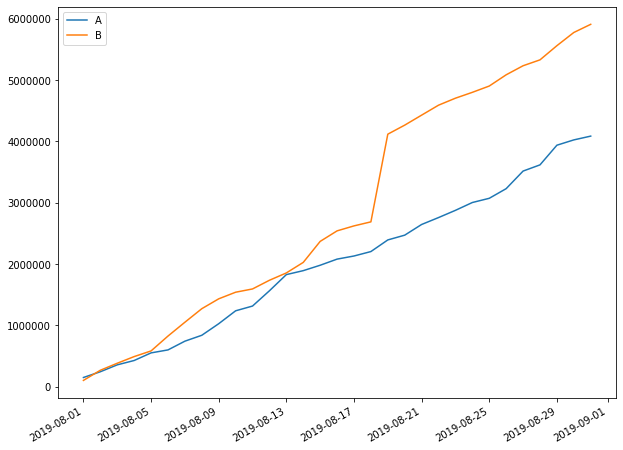

In [19]:
#Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и B

cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

#График выручки группы А и B
fig = plt.figure(figsize=[10,8])
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A') ;
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B') ;
fig.autofmt_xdate() ;
plt.legend() ;

Выручка по группам растет, но выручка в группе В резко возрастает относительно вырчуки в группе А. Это может быть связано как с возросшим количеством заказов, так и с появлением очень дорогих заказов.

#### График кумулятивного среднего чека по группам

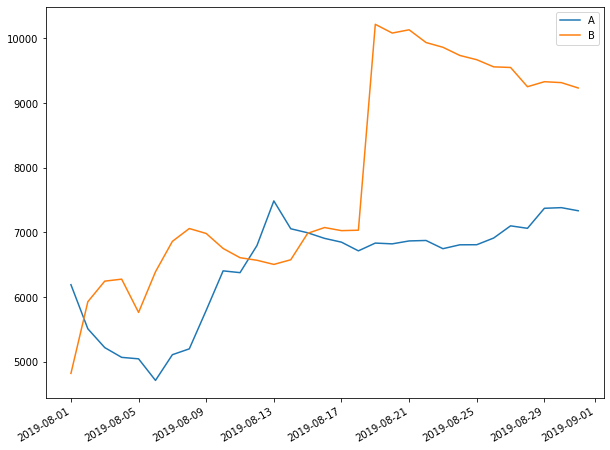

In [20]:
fig = plt.figure(figsize=[10,8])
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A') ;
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B') ;
fig.autofmt_xdate() ;
plt.legend() ;


В то же время как выросла выручка в группе В, вырос и средний чек. Скорее всего это какие-то очень крупные заказы. Средний чек группы А тоже вырос в сравнении с началом теста, но, конечно, меньше,чем для группы В.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

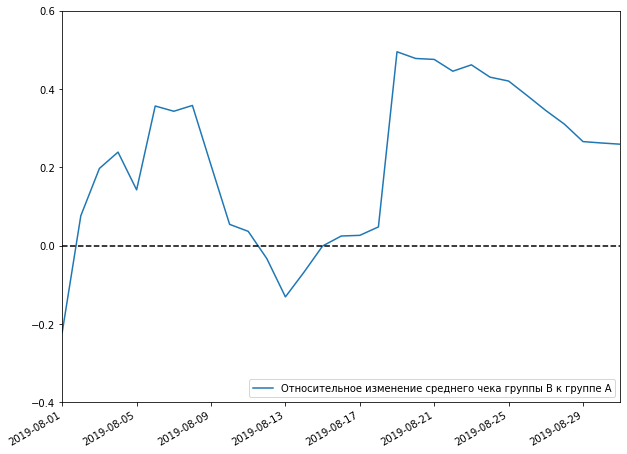

In [21]:
fig = plt.figure(figsize=[10,8])

mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Отношение среднего чека группы В к группе А
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1, label="Относительное изменение среднего чека группы B к группе A")
plt.legend(loc='lower right')
fig.autofmt_xdate()
#ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.6])
plt.show()

На графике виден резкий скачек в тот же период как и на предыдущих. Средний чек растет, затем резкое падение и снова рост еще больше, уже появляется уверенность, что это может быть очень крупный заказ или выбросы.

#### Кумулятивная конверсия по группам

In [22]:
#Кумулятивная конверсия
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
#Для того, чтобы задать масштаб для оси У выведу минимальное и максимальное значение конверсии
print(cummulativeData['conversion'].min().round(5))
print(cummulativeData['conversion'].max().round(5))

0.02922
0.03686


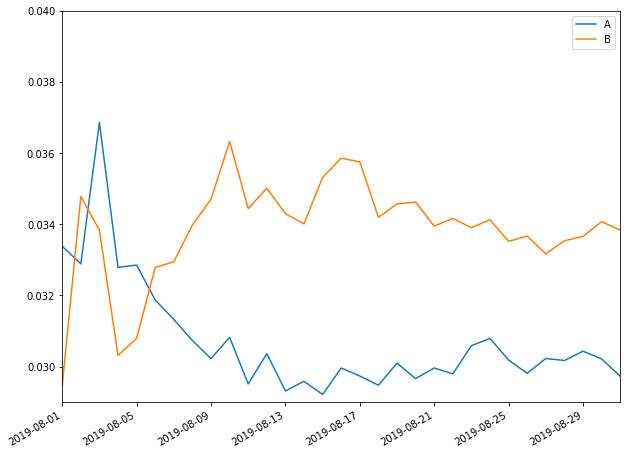

In [23]:
#Данные группы А и группы В
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

fig = plt.figure(figsize=[10,8])
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
fig.autofmt_xdate()
plt.legend()

#Масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.029, 0.040])
plt.show()

Конверсия группы А изначально выше, чем группы В, затем конверсия группы В идет на увеличение и относительно фиксируется, без резких колебаний, тоже самое происходит и с группой А, но конверсия снижается.

#### Относительное изменение кумулятивной конверсии группы B к группе A

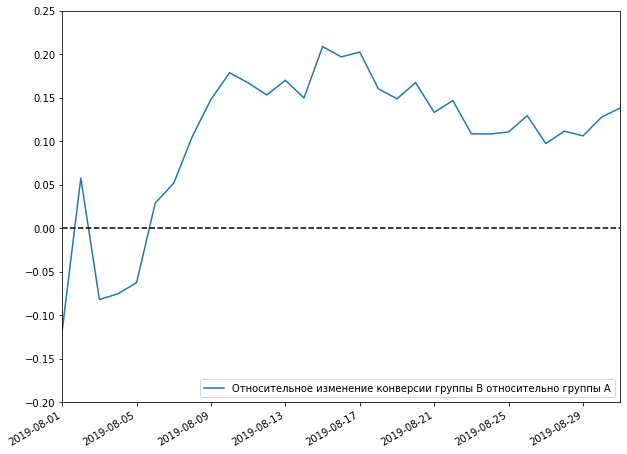

In [24]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure(figsize=[10,8])
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительное изменение конверсии группы B относительно группы A")
plt.legend(loc="lower right")
fig.autofmt_xdate()

plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.25])

plt.show()

В начале теста конверсия группы В была меньше,чем конверсия группы А, но затем выросла. Необходимо проверить наличие выбросов.

#### Точечный график количества заказов по пользователям

In [25]:
ordersbyvisitors = orders.groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})

ordersbyvisitors.columns = ['visitorid','orders']

print(ordersbyvisitors.sort_values(by='orders',ascending=False).head(10))

       visitorid  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


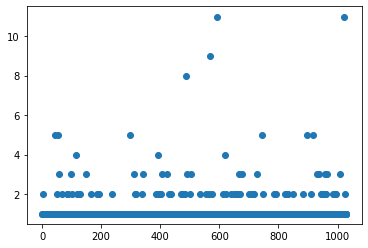

In [26]:
x_values = pd.Series(range(0,len(ordersbyvisitors)))

plt.scatter(x_values, ordersbyvisitors['orders']);

Большинство покупателей сделали 1 заказ, так же есть покупатели которые сделали 2-5 заказов, но их доля небольшая. Так же есть покупатели которые сделали более 8 заказов, не ясна доля таких покупателей.

#### 95-й и 99-й перцентили количества заказов на пользователя

In [27]:
np.percentile(ordersbyvisitors['orders'], [95, 99])

array([2., 4.])

Не более 5% покупателей сделали более 2-ух заказов и не более 1% покупателей сделали 4 заказа. Можно выбрать 4 заказа за границу числа заказов, аномальные значения удалить.

#### Точечный график стоимостей заказов

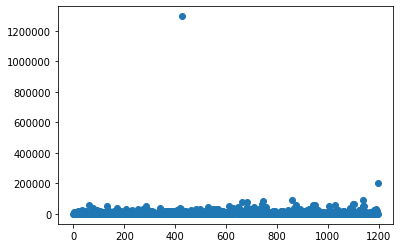

In [28]:
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])

Из графика видны выбросы стоимостью более 1 200 000, скорее всего этот заказ повлиял на резкий скачок выручки группы В, но чтобы посмотреть  срееднюю стоимость заказов необходимо посмотреть ближе.

[0, 1210, 0, 100000]

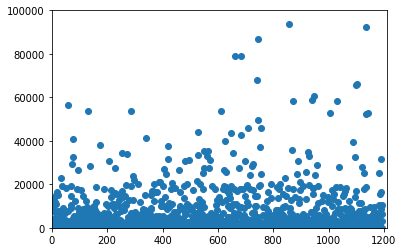

In [29]:
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1210, 0, 100000]) 

Чаще всего стоимость заказов находится в пределах до 20 000, но есть и заказы стоимостью выше.

#### 95-й и 99-й перцентили стоимости заказов

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов были сделаны на сумму больше 28 000 и не более 1% заказов были сделаны на сумму более 58 000. За границу стоимости заказов приму 58 000.

#### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [31]:
#Количество пользователей до выбранной даты включительно в группах A и B

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [32]:
#Суммарное количество заказов до выбранной даты включительно в группах A и B
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [33]:
#датафрейм с количеством заказов, выручкой в день, количество заказов, общей выручкой, количество пользователей до выбранной даты 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [34]:
#Переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [35]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.


U-критерий Манна — Уитни (англ. Mann–Whitney U-test) — статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

В sampleA выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().

*Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.*


*Альтернативная гипотеза: есть статистически значимые различия в конверсии между группами.* 

In [37]:
#Относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


P-value = 0.008, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. Относительный прирост группы В равен 14%. По «сырым» данным есть различия в конверсии групп A и B.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

*Нулевая гипотеза: статистически значимых различий в  среднем чеке заказа между группами нет.*

*Альтернативная гипотеза: есть статистически значимые различия в среднем чеке заказа между группами.*

In [38]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

#### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

In [39]:
# 95% и 99%
rev_tmp_1 = np.percentile(ordersbyvisitors['orders'], [95, 99])
rev_tmp_2 = np.percentile(orders['revenue'], [95, 99])
print(f"orders [95%, 99%]: \t{rev_tmp_1}")
print(f"revenue [95%, 99%]: \t{rev_tmp_2}")

# в качестве границы выбрать 99-й перцентиль
# поэтому вычислим только 99-ые перцентили.
rev_tmp_1 = np.percentile(ordersbyvisitors['orders'], 99)
rev_tmp_2 = np.percentile(orders['revenue'], 99)
print(f"orders 99%: \t{rev_tmp_1}")
print(f"revenue 99%: \t{rev_tmp_2}")

# переменные:
rev_threshold_orders = np.percentile(ordersbyvisitors['orders'], 99)
rev_threshold_revenue = np.percentile(orders['revenue'], 99)

print(f"treshold_orders: \t{rev_threshold_orders}")
print(f"treshold_revenue: \t{rev_threshold_revenue}")

orders [95%, 99%]: 	[2. 4.]
revenue [95%, 99%]: 	[28000.  58233.2]
orders 99%: 	4.0
revenue 99%: 	58233.19999999999
treshold_orders: 	4.0
treshold_revenue: 	58233.19999999999


In [40]:
usersWithManyOrders = ordersbyvisitors[ordersbyvisitors['orders'] > rev_threshold_orders]['visitorid'] 
usersWithExpensiveOrders = orders[orders['revenue'] > rev_threshold_revenue]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей: {}".format(abnormalUsers.shape))

1099    148427295
44      199603092
55      237748145
949     887908475
744     888512513
Name: visitorid, dtype: int64
Всего аномальных пользователей: (21,)


Узнаю, как действия аномальных пользователей повлияли на результаты теста. Посчитаю статистическую значимость различий в конверсии между группами теста по очищенным данным.

*Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.*

*Альтернативная гипотеза: есть статистически значимые различия в конверсии между группами.*

In [41]:
#Выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [42]:
#Применяю статистический критерий Манна-Уитни к полученным выборкам
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.154


Результаты конверсии почти не изменились. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. По «очищенным» данным есть различия в конверсии групп A и B.


#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

*Нулевая гипотеза: статистически значимых различий в  среднем чеке заказа между группами нет.*

*Альтернативная гипотеза: есть статистически значимые различия в среднем чеке заказа между группами.*

In [43]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.479
-0.014


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По «очищенным» данным средний чек группы B немного уступает группе A, по  «сырым» данным чек группы B был больше на 26%.

Статистические тесты дали одинаковые результаты как на «сырых», так и на «очищенных данных».

#### Решение по результатам теста 

+  Как по «сырым» данным есть различия в конверсии групп A и B, так и по «очищенным» данным есть различия в конверсии групп A и B.
+ Как по «сырым», так и по «очищенным» данным нет статистически значимого различия по среднему чеку между группами. По «очищенным» данным средний чек группы B немного уступает группе A, по «сырым» данным чек группы B был больше на 26%.

Тест можно останаливать и зафиксировать положительный результат группы В.
На основании результатов, можно остановить тест и зафиксировать победу группы B, в связи с тем, что есть статистически значимое различие по конверсии между группами, относительный прирост конверсии группы B 17%.

Входные данные относительно чистые, необходимо было провести подготовку данных, которая заключалась в изменение типа данных столбцов с датой и переименовании столбцов для удобства написания кода, в остальном все ок.
    
Затем этап приоритезации гипотез. Гипотеза 8 про акцию в честь дня рождения согласно ICE занимает 1 место, а согласно RICE - 5. RICE учитывает охват пользователей, поэтому гипотеза 7 на первом месте согласно RICE, так как это затронет гораздо больше пользователей, чем акция в честь дня рождения.
    
Согласно графикам кумулятивной выручки и среднего чека по группам, группа В изначально показала себя как более перспективная. Конечно, это так же связано с выбросами в данных (аномально высокая цена заказа).

    
Статистические тесты различий в среднем чеке заказа дали одинаковые результаты как на «сырых», так и на «очищенных данных»: статистически значимых различий в  среднем чеке заказа между группами нет, но припрост конверсия группы В 17% по очищенным данным, поэтому тест показал положительный результат для группы В и его можно останаливать.
    